In [1]:
import numpy as np
from numpy import array
from numpy.linalg import inv
from matplotlib import pyplot
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

<h2> Visualization of the Design matrix A</h2>
<p>The design matrix has 3 rows representing our three samples and two columns representing our two parameters</p>

\begin{align}
A &= \begin{pmatrix}
1 & 1 \\
1 & 2 \\
1 & 3 \\
\end{pmatrix}
\end{align}




<IPython.core.display.Javascript object>


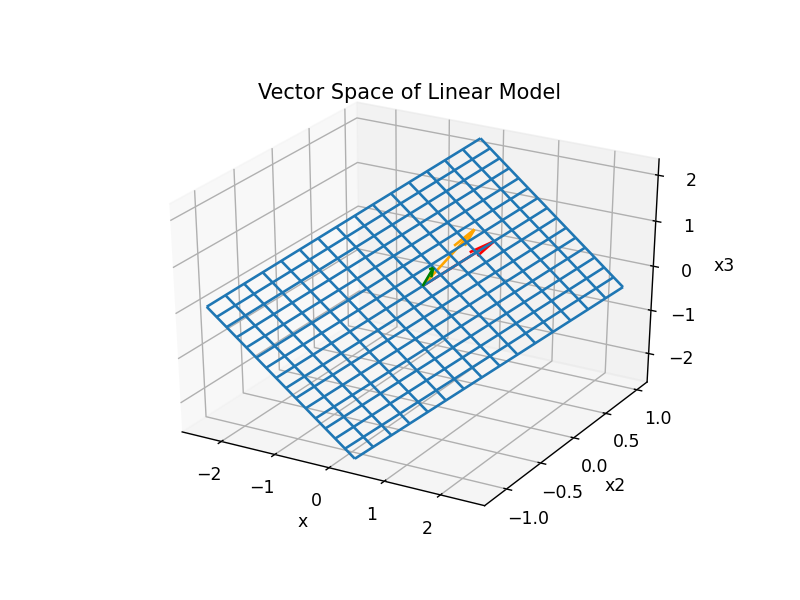

[Text(0.5, 0, 'x3'),
 Text(0.5, 0, 'x2'),
 Text(0.5, 0, 'x'),
 Text(0.5, 0.92, 'Vector Space of Linear Model')]

In [2]:
%matplotlib notebook


fig = plt.figure(num=1, clear=True)
ax = fig.add_subplot(1, 1, 1, projection='3d')


(x, y) = np.meshgrid(np.arange(-2, 2, .25), np.arange(-2, 2, .25))

xx = (1/np.sqrt(3))*x + (-1/np.sqrt(2)*y)
yy = (1/np.sqrt(3))*x 
zz = (1/np.sqrt(3))*x + (1/np.sqrt(2)*y)


ax.plot_wireframe(xx, yy,zz, cmap=cm.plasma)
ax.quiver(0,0,0,2,-1,3,length=1, normalize=True,color="green")
ax.quiver(0,0,0,1,1,1,color={'red'},length=1,normalize=True)
ax.quiver(0,0,0,1,2,3,color={"orange"},length=1,normalize=True)
ax.set(xlabel='x', ylabel='x2', zlabel='x3', title='Vector Space of Linear Model')

<h2> Example 1. Our goal is to find the best guess $\hat \beta$ starting with the following equation:</h2>

 \begin{equation}  \qquad A \quad  \beta  \quad =   \quad y \end{equation}

\begin{gather}
 \begin{pmatrix}
1 & 1 \\
1 & 2 \\
1 & 3 \\
\end{pmatrix}
\begin{pmatrix}
\beta_0 \\
\beta_1 \\
\end{pmatrix}
 =
\begin{pmatrix}
2 \\
-1 \\
3 \\
\end{pmatrix}
\end{gather}

<h2> 1) First lets plot our data</h2>

<IPython.core.display.Javascript object>


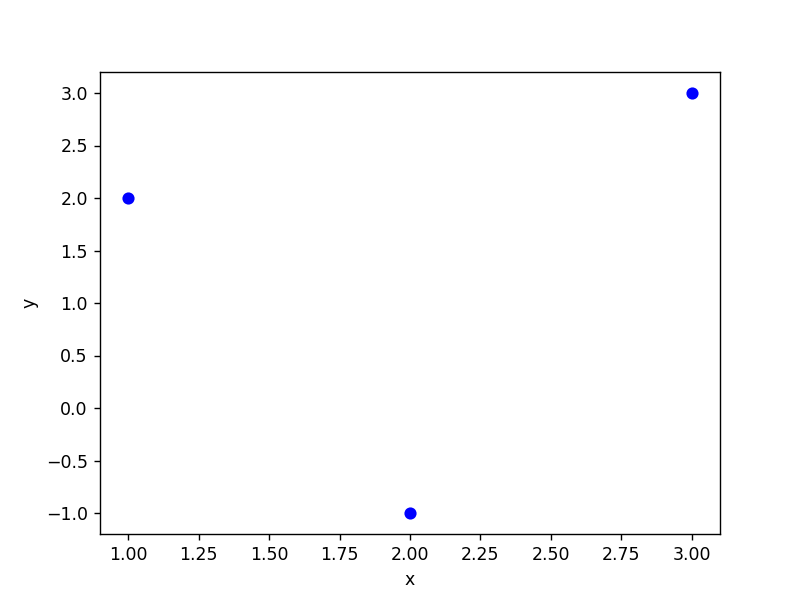

Text(0, 0.5, 'y')

In [3]:
y = np.array([2,-1,3])
x = np.array([1,2,3])

plt.plot(x, y, 'o', color='blue');
plt.xlabel("x")
plt.ylabel("y")

<h2>2) Construct the design matrix A and target vector y </h2>

\begin{align}
A &= \begin{pmatrix}
1 & 1 \\
1 & 2 \\
1 & 3 \\
\end{pmatrix}, & 
y &= \begin{pmatrix}
2 \\
-1\\
3 \\
\end{pmatrix}
\end{align} 

In [4]:
A = np.matrix([[1,1],[1,2],[1,3]])
y = array([2,-1,3])

<h2>3) Find $\hat\beta$ values using the normal equation </h2>

\begin{equation}  \qquad  \quad  \hat\beta  \quad =   \quad (A^{T}A)^{-1}A^{T}y \end{equation}


In [5]:
b = inv(A.T.dot(A)).dot(A.T).dot(y)
b[0,0],b[0,1]

(0.3333333333333339, 0.5)

<h2> 4) Construct regression line $\hat y = \hat\beta_o + \hat\beta_1 x $</h2>

In [6]:
N = 3
x_hat = np.linspace(.5,4,N)
y_hat = np.repeat(b[0,0],N)+ b[0,1]*(x_hat)

<h2> 5) Plot data and linear regression equation </h2>

<IPython.core.display.Javascript object>


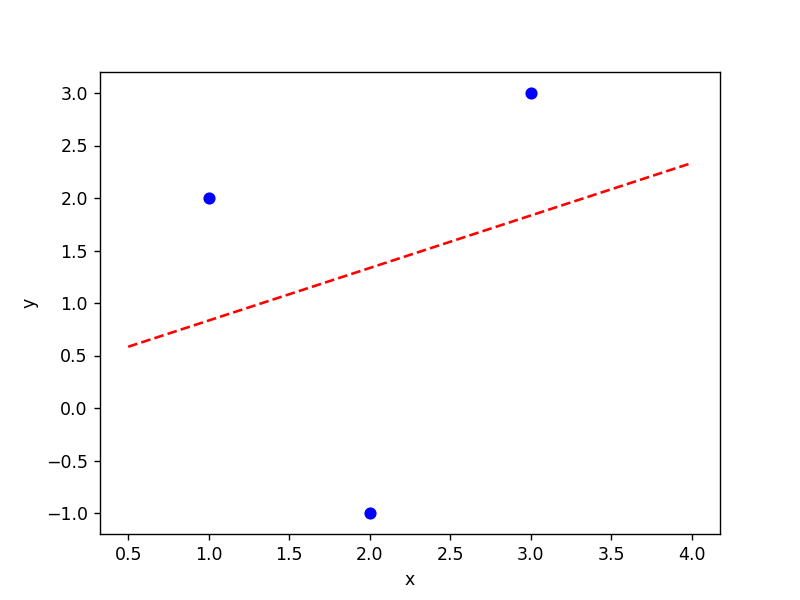

Text(0, 0.5, 'y')

In [7]:
fig = plt.figure(num=1, clear=True)
ax = fig.add_subplot(1, 1, 1)
ax.plot(x_hat,y_hat,color='red',linestyle="--")
ax.plot(x,y ,'o', color='blue')
plt.xlabel("x")
plt.ylabel("y")

<h2> 6) Calculate the mean squared error </h2>

In [8]:
np.mean((y-y_hat)**2)

2.831597222222222

<h2> Example 2. Perform linear regression on the boston housing dataset </h2>
<p> This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass.<p>

In [9]:
import pandas as pd  
import seaborn as sns 
from sklearn.datasets import load_boston
boston_dataset = load_boston()

<h3> Want to explore the relationship between median value of homes and with respect to the % lower socienomic class </h3>
<p>LSTAT - % lower status of the population
<p>MEDV - Median value of owner-occupied homes in $1000's </p>


In [10]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

In [11]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
boston['MEDV'] = boston_dataset.target

<h2> 1) First lets plot our data</h2>

<IPython.core.display.Javascript object>


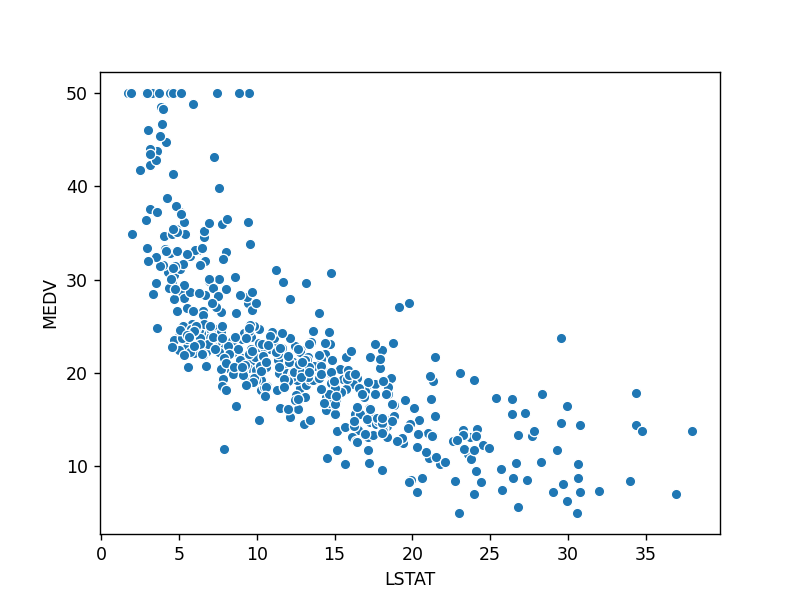

In [13]:
sns.scatterplot(boston['LSTAT'],boston['MEDV'])

In [14]:
boston.shape[0]

506

<h2>2) Construct the design matrix A from data and target vector y </h2>



In [15]:
X = boston['LSTAT']
y = boston['MEDV']

In [16]:
A = np.stack((np.repeat(1,len(X)),X),axis=1)
A

array([[1.  , 4.98],
       [1.  , 9.14],
       [1.  , 4.03],
       ...,
       [1.  , 5.64],
       [1.  , 6.48],
       [1.  , 7.88]])

<h2>3) Find $\hat\beta$ values using the normal equation </h2>

\begin{equation}  \qquad  \quad  \hat\beta  \quad =   \quad (A^{T}A)^{-1}A^{T}y \end{equation}

In [17]:
b = inv(A.T.dot(A)).dot(A.T).dot(y)
b[0],b[1]

(34.55384087938302, -0.9500493537579853)

<h2> 4) Construct regression line $\hat y = \hat\beta_o + \hat\beta_1 x $</h2>

In [18]:
x_hat = np.linspace(0,35,len(X))
y_hat = np.repeat(b[0],len(X))+ b[1]*(x_hat)

<IPython.core.display.Javascript object>


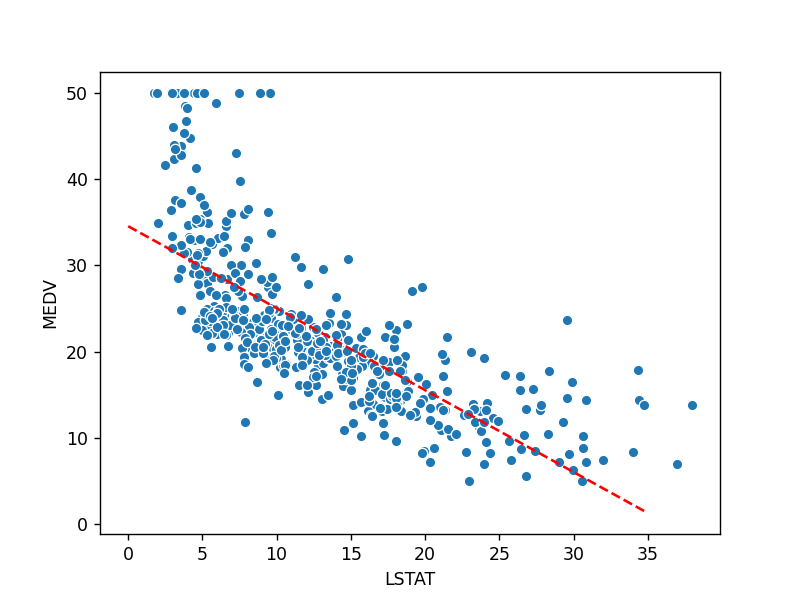

In [19]:
sns.scatterplot(boston['LSTAT'],boston['MEDV'])
plt.plot(x_hat,y_hat,'r',ls ='dashed')

<h2> 5) Calculate the Mean Squared Error </h2>

In [20]:
np.mean((y-y_hat)**2)

158.0789040077474

<h2>Example3. Quadratic regression of housing data </h2>

$\hat y = \hat\beta_o + \hat\beta_1 x + \hat\beta_2 x^2 $

Our normal matrix becomes
 \begin{equation} \quad \qquad A \qquad  \quad \hat\beta  \quad =   \quad y \end{equation}

\begin{gather}
 \begin{pmatrix}
1 & x_{11} & x_{12}^2\\
1 & x_{21} & x_{22}^2\\
\vdots & \vdots & \vdots \\
1 & x_{n1} & x_{n2}^2\\
\end{pmatrix}
\begin{pmatrix}
\hat\beta_0 \\
\hat\beta_1 \\
\hat\beta_2 \\
\end{pmatrix}
 =
\begin{pmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n \\
\end{pmatrix}
\end{gather}



<h2>1) Construct the design matrix </h2>

In [21]:
A = np.stack((np.repeat(1,len(X)),X,X**2),axis=1)

<h2>2) Find $\hat\beta$ values using the normal equation </h2>

\begin{equation}  \qquad  \quad  \hat\beta  \quad =   \quad (A^{T}A)^{-1}A^{T}y \end{equation}

In [22]:
b = inv(A.T.dot(A)).dot(A.T).dot(y)

<h2> 3) Construct regression line $\hat y = \hat\beta_o + \hat\beta_1 x + \hat\beta_2 x^2 $</h2>

In [23]:
x_hat = np.linspace(0,35,len(X))
y_hat = np.repeat(b[0],len(X))+ b[1]*(x_hat) + b[2]*(x_hat**2)
b[0],b[1],b[2]

(42.86200732816849, -2.3328210982826088, 0.043546889358218634)

<IPython.core.display.Javascript object>


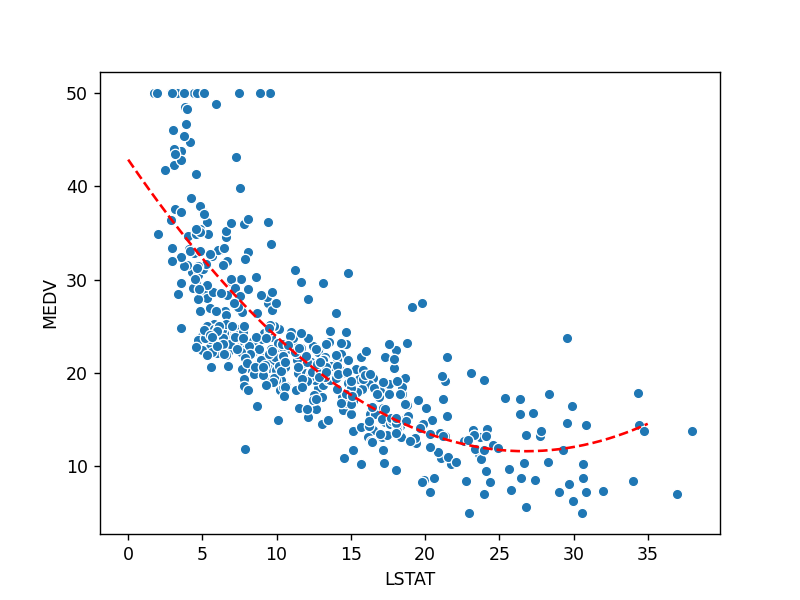

In [24]:
sns.scatterplot(boston['LSTAT'],boston['MEDV'])
plt.plot(x_hat,y_hat,'r',ls ='dashed')

<h2> 5) Calculate the Mean Square Error</h2>

In [26]:
np.mean((y-y_hat)**2)

167.64984280602962

<h2> Practice Problem </h2>
<p> Use the following data to create linear, quadratic and cubic regressions for the data in the cell below. Compare the MSE of these three models which model is the best fit to the data? What are some disadvantages to using the MSE as a measure of a regression model fit?</p>
<p> $ \textbf{X}$ is the data and $\textbf{y}$ is the target variable </p>

In [ ]:
np.random.seed(0)
X = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)
plt.scatter(x,y, s=10)
plt.show()